Podstawowe informacje o zbiorze danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB
None

Statystyki opisowe:
               id      gender         PPE         DFA        RPDE   numPulses  \
count  756.000000  756.000000  756.000000  756.000000  756.000000  756.000000   
mean   125.500000    0.515873    0.746284    0.700414    0.489058  323.972222   
std     72.793721    0.500079    0.169294    0.069718    0.137442   99.219059   
min      0.000000    0.000000    0.041551    0.543500    0.154300    2.000000   
25%     62.750000    0.000000    0.762833    0.647053    0.386537  251.000000   
50%    125.500000    1.000000    0.809655    0.700525    0.484355  317.000000   
75%    188.250000    1.000000    0.834315    0.754985    0.586515  384.250000   
max    251.000000    1.000000    0.907660    0.852640    0.871230  907.000000   

       numPeriodsPulses  meanPeriodPulses  std

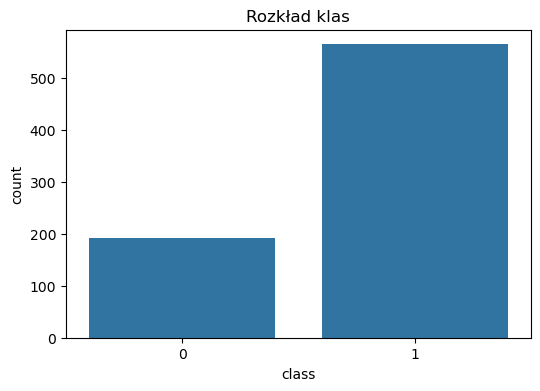


Regresja liniowa - MSE: 0.0189


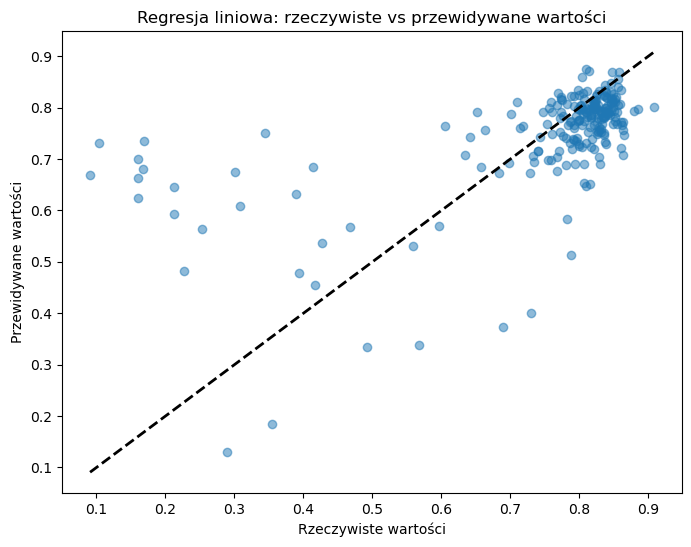


Klasyfikacja SVM - Dokładność: 0.8062


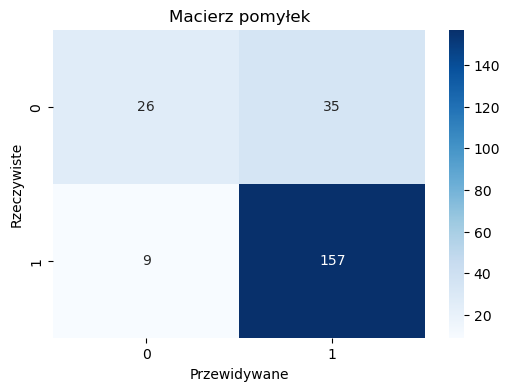


Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.74      0.43      0.54        61
           1       0.82      0.95      0.88       166

    accuracy                           0.81       227
   macro avg       0.78      0.69      0.71       227
weighted avg       0.80      0.81      0.79       227



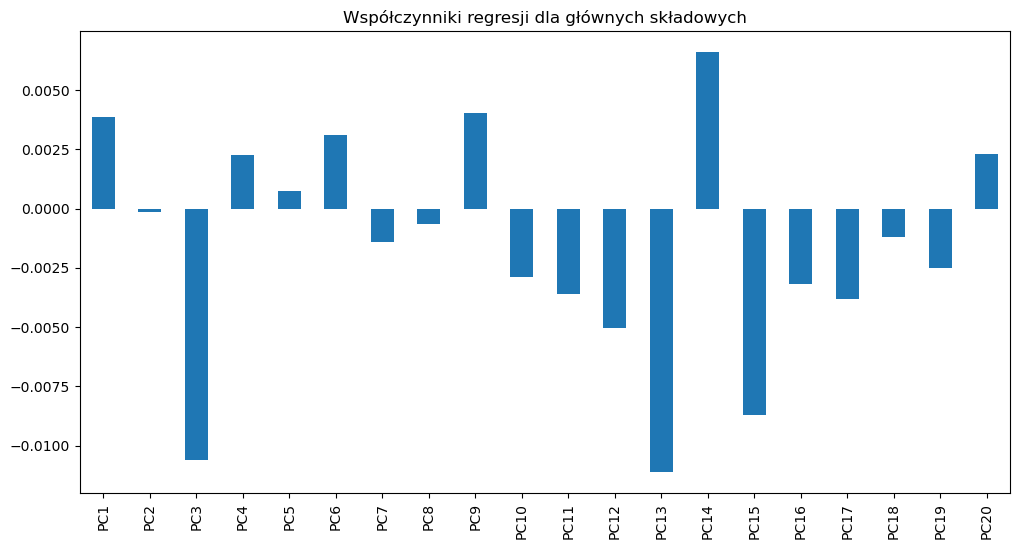

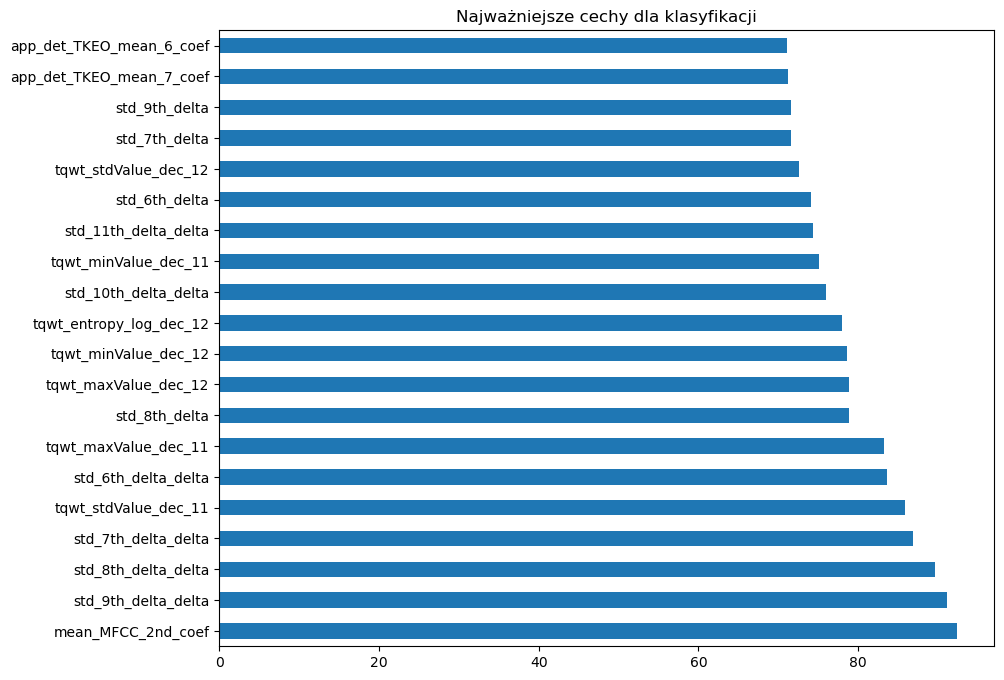

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

# Wczytanie danych
data = pd.read_csv('pd_speech_features.csv')

print("Podstawowe informacje o zbiorze danych:")
print(data.info())

print("\nStatystyki opisowe:")
print(data.describe())

print("\nLiczba brakujących wartości:")
print(data.isnull().sum())

plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=data)
plt.title('Rozkład klas')
plt.show()

X = data.drop(['id', 'class'], axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
selector = SelectKBest(f_classif, k=20)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

X_reg = data.drop(['id', 'PPE'], axis=1)
y_reg = data['PPE']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

pca_reg = PCA(n_components=20)
X_train_reg_pca = pca_reg.fit_transform(X_train_reg_scaled)
X_test_reg_pca = pca_reg.transform(X_test_reg_scaled)

reg_model = LinearRegression()
reg_model.fit(X_train_reg_pca, y_train_reg)

y_pred_reg = reg_model.predict(X_test_reg_pca)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"\nRegresja liniowa - MSE: {mse:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2)
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Przewidywane wartości')
plt.title('Regresja liniowa: rzeczywiste vs przewidywane wartości')
plt.show()

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_selected, y_train)

y_pred = svm_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nKlasyfikacja SVM - Dokładność: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Macierz pomyłek')
plt.xlabel('Przewidywane')
plt.ylabel('Rzeczywiste')
plt.show()

print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred))

coef = pd.Series(reg_model.coef_, index=[f'PC{i+1}' for i in range(20)])
coef.plot(kind='bar', figsize=(12, 6))
plt.title('Współczynniki regresji dla głównych składowych')
plt.show()

feature_scores = pd.Series(selector.scores_, index=X.columns)
top_features = feature_scores.nlargest(20)
top_features.plot(kind='barh', figsize=(10, 8))
plt.title('Najważniejsze cechy dla klasyfikacji')
plt.show()